our guards =  [(0.0, 1.0), (2.0, 4.0)]


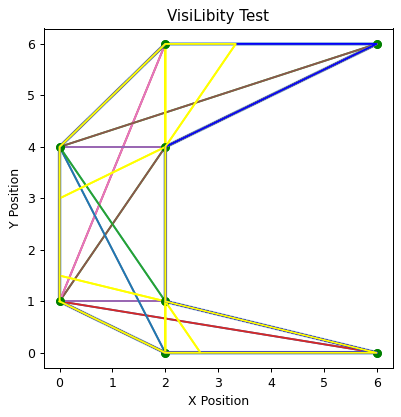

In [6]:
import json
import matplotlib.pylab as p
from shapely.geometry.polygon import LinearRing, Polygon
import shapely
import shapely.ops
import shapely.wkt
from shapely.geometry import shape, mapping
import numpy as np
import visilibity as vis
from shapely.geometry import shape, JOIN_STYLE
from shapely.ops import cascaded_union
def save_print(polygon):
        end_pos_x = []
        end_pos_y = []
#         print ('Points of Polygon: ')
        for i in range(polygon.n()):
            x = polygon[i].x()
            y = polygon[i].y()

            end_pos_x.append(x)
            end_pos_y.append(y)

#             print(x,y) 

        return end_pos_x, end_pos_y 
def sortSecond(val): 
    return val[1]
class pol:
    def __init__(self,poly):
        self.poly=poly
        self.poly2=poly
        self.x,self.y = self.poly.exterior.xy
        self.number_vertex=len(self.x)-1
        self.comp1=[self.poly]
        self.comp2=[self.poly]
        self.ax = self.make_plot() 

    def make_plot(self):
        fig = p.figure(0, figsize=(5,5), dpi=90)
        ax = fig.add_subplot(111)
        ax.plot(self.x, self.y, color='#6699cc', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
        ax.set_title('Polygon')
        return ax
    
    def make_multi_fig(self, polies):
        num = 1
        for polly in polies:
            x1,y1 = polly.exterior.xy
            fig = p.figure(num)
            ax = fig.add_subplot(111)
            ax.plot(x1,y1)
            num+=1

    def splite_shapes(self, poly_list):
        pass

    def visibility(self):
        observer_list=[]
        final_guards=[]
        first_component=self.split_with_diags(self.poly)
        first_component_round=[]
        for component in first_component:
            lists1=[]
            x1,y1 = component.exterior.xy
            for b in range (len(x1)):
                 lists1.append((round(x1[b],2),round(y1[b],2)))
            round_polygon= Polygon(lists1)
            first_component_round.append(round_polygon)
        deleted_list_component=[]
        deleted_list_component.append(self.split_with_diags(self.poly))
        polygon=self.poly


        while len(deleted_list_component)!=0:
            
            total_list_visible_component=[]
            number_comp_visible=[]
            list_guards=[]
 
            x,y = polygon.exterior.xy
            number_vertex=len(x)-1

            for i in range(len(x)):
                observer_list.append(vis.Point(x[i], y[i]))
            for k in range(number_vertex):
                list_visible_component=[]
                observer =observer_list[k]
                points=[]
                epsilon = 0.0000001
                for i in range(number_vertex):
                    point=vis.Point(x[i],y[i])
                    points.append(point)
                polygon_ready_for_visible=vis.Polygon(points)
                env = vis.Environment(polygon_ready_for_visible)
                observer.snap_to_boundary_of(env, epsilon)
                observer.snap_to_vertices_of(env, epsilon)
                viss=vis.Visibility_Polygon(observer, env, epsilon)
                point_x , point_y  = save_print(viss)
                point_x.append(viss[0].x())
                point_y.append(viss[0].y())
                p.title('VisiLibity Test')
                p.xlabel('X Position')
                p.ylabel('Y Position')
                p.plot(self.x,self.y,'blue')
                p.plot([observer.x()], [observer.y()], 'go')
                p.plot(point_x, point_y,'yellow')
                list_of_point=[]

                for b in range (len(point_x)):
                    list_of_point.append((round(point_x[b],2),round(point_y[b],2)))
                visibile_polygon=Polygon(list_of_point)
                for component in first_component_round:
                    if visibile_polygon.contains(component):
                        list_visible_component.append(component)
                list_guards.append(observer)
                total_list_visible_component.append(list_visible_component)
                number_comp_visible.append(len(list_visible_component))
                max_vertex=number_comp_visible.index(max(number_comp_visible))
            observer_list.remove(observer_list[max_vertex])
            final_guards.append((list_guards[max_vertex].x(),list_guards[max_vertex].y()))
            component_ready_to_delete=total_list_visible_component[max_vertex]
            deleted_list_component=[]
            number_vertex=number_vertex-1
            for element in first_component_round:
                if element  not in component_ready_to_delete:
                    deleted_list_component.append(element)
            first_component_round=deleted_list_component
        print('our guards = ',final_guards)


    def get_diags(self,polygon):
        diag_list = []
        x,y = polygon.exterior.xy
        number_vertex=len(x)-1
        for i in range (0,number_vertex-2):
            for j in range (i+2,number_vertex):
                x_values=[x[i],x[j]]
                y_values = [y[i], y[j]]
                
                diag = shapely.geometry.LineString([(x[i],y[i]),(x[j],y[j])])
                
                if polygon.contains(diag):
                    p.plot(x_values, y_values)
                    diag_list.append(diag)
                    
        return diag_list

    def split_with_diags(self,polygon):
        
        diags_list = self.get_diags(polygon)
        
        shapes_list = [polygon]
        
        for line in diags_list:
            final_result = []
            for poly in shapes_list:
                total = shapely.ops.split(poly,line)
                for shape in total:
                    if (shape in final_result) is False:
                        final_result.append(shape)
            shapes_list = final_result 
            
#         self.make_multi_fig(shapes_list)
        return shapes_list

    
    

    


poly1 = Polygon([
                (0, 0),  (2, 0),(1,1),(1,3),(0,1)])

poly3 = Polygon([(0,1),(2,0),(6,0),(2,1),(2,4),(6,6),(2,6),(0,4),(0,1)])
poly2= Polygon([(0,2), (0,0), (3,0),(4,1),(2.5,1),(2.5,2),(2,2),(1,0.5),(0.5,2)])

A=pol(poly3)
A.visibility()
